https://www.youtube.com/watch?v=fDek6cYijxI

https://en.wikipedia.org/wiki/Lorenz_system

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

Here I will do the ODE version first, cuz I am not familiar with the Navier Stoke Eqt

d/dt(x) = σ(y-x)

d/dt(y) = x(ρ-z)-y

d/dt(z) = xy-βz

In [12]:
%matplotlib inline
import numpy as np, matplotlib.pyplot as plt, matplotlib.font_manager as fm, os
from scipy.integrate import odeint
from mpl_toolkits.mplot3d.axes3d import Axes3D

#initial conditions
initial_state = [1,1,1] #cant be [0,0,0]
#system parameters from wikipedia at the simulation part
sigma = 10
rho = 28
beta = 8/3
#starting time, ending time, time steps
start_time = 0
end_time = 100
time_points = np.linspace(start_time, end_time, end_time*100)

#the lorenz system
def lorenz_system(initial_state, t):
    
    x = initial_state[0]
    y = initial_state[1]
    z = initial_state[2]
    # define the 3 ordinary differential equations known as the lorenz equations
    dx = sigma*(y-x)
    dy = x*(rho-z)-y
    dz = x*y-beta*z
    
    # return a list of the equations that describe the system
    return [dx, dy, dz]

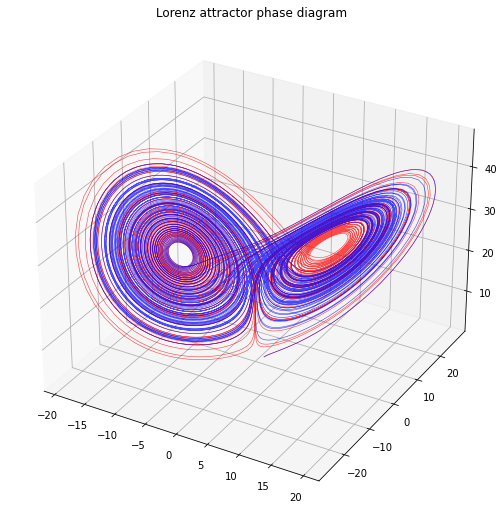

In [17]:
alternate_state = [1.1,1,1]
# use odeint() to solve a system of ordinary differential equations
# the arguments are: 
# 1, a function - computes the derivatives
# 2, a vector of initial system conditions (aka x, y, z positions in space)
# 3, a sequence of time points to solve for
# returns an array of x, y, and z value arrays for each time point, with the initial values in the first row
xyz = odeint(lorenz_system, initial_state, time_points)
xyz0 = odeint(lorenz_system, alternate_state, time_points)
# extract the individual arrays of x, y, and z values from the array of arrays
x = xyz[:, 0]
y = xyz[:, 1]
z = xyz[:, 2]
X = xyz0[:, 0]
Y = xyz0[:, 1]
Z = xyz0[:, 2]
# plot the lorenz attractor in three-dimensional phase space
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
ax.plot(x, y, z, color='r', alpha=0.7, linewidth=0.6)
ax.plot(X, Y, Z, color='b', alpha=0.7, linewidth=0.6)
ax.set_title('Lorenz attractor phase diagram')

plt.show()

In [18]:
xyz

array([[ 1.        ,  1.        ,  1.        ],
       [ 1.01256821,  1.2599461 ,  0.98488969],
       [ 1.04883096,  1.52405449,  0.97311235],
       ...,
       [ 0.12684449, -4.39039319, 26.78992682],
       [-0.30097418, -4.34837417, 26.08884905],
       [-0.68452886, -4.31641811, 25.42350973]])

In [20]:
xyz0

array([[ 1.1       ,  1.        ,  1.        ],
       [ 1.10431321,  1.28562856,  0.9860965 ],
       [ 1.13544511,  1.57337348,  0.97592429],
       ...,
       [-1.7643055 ,  1.57462936, 25.64761175],
       [-1.44935394,  1.51598545, 24.94818495],
       [-1.17000357,  1.45694984, 24.27245472]])